In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vehicle_maintenance_data.csv')
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,11/23/2023,6/24/2025,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,9/21/2023,6/4/2025,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,6/27/2023,4/27/2025,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,8/24/2023,11/5/2025,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,5/25/2023,9/14/2025,Third,16446,6,2,16.977483,Good,Good,Weak,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [75]:
df.describe()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


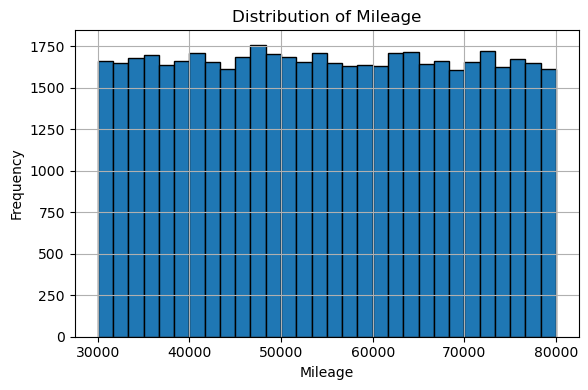

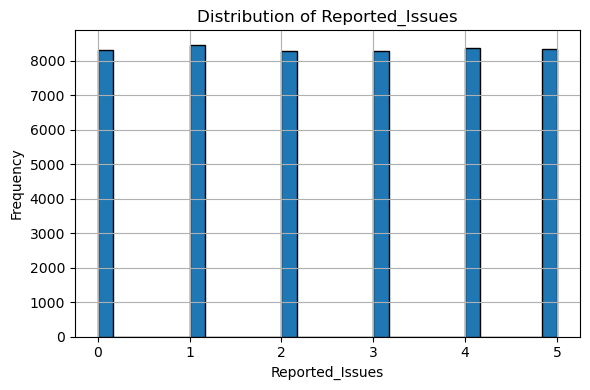

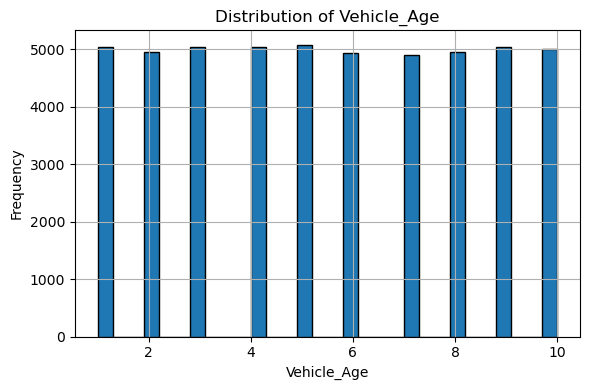

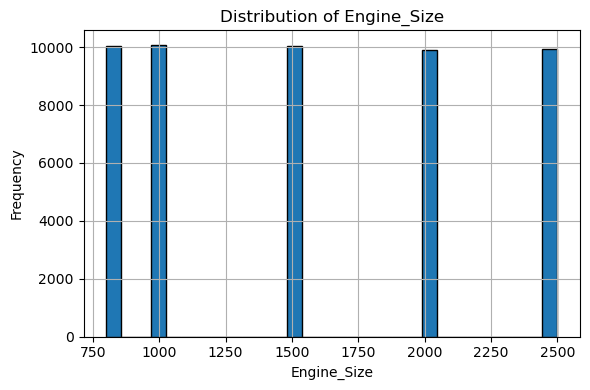

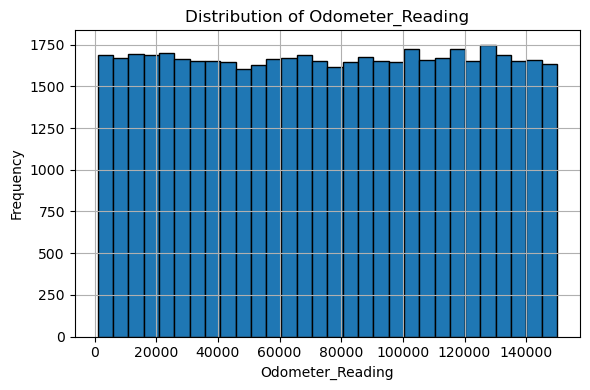

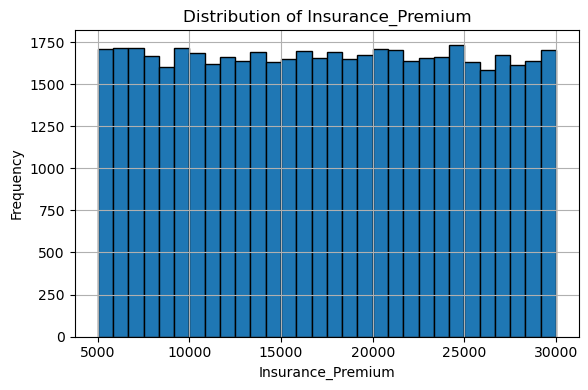

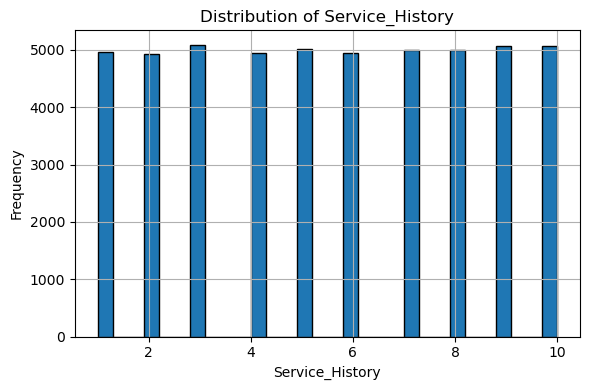

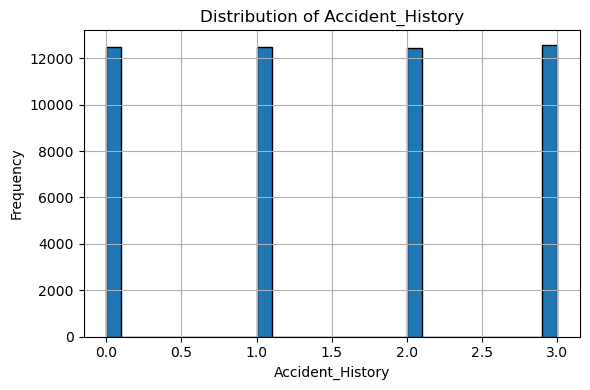

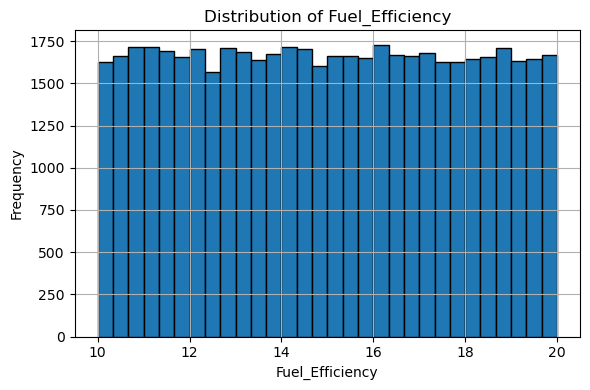

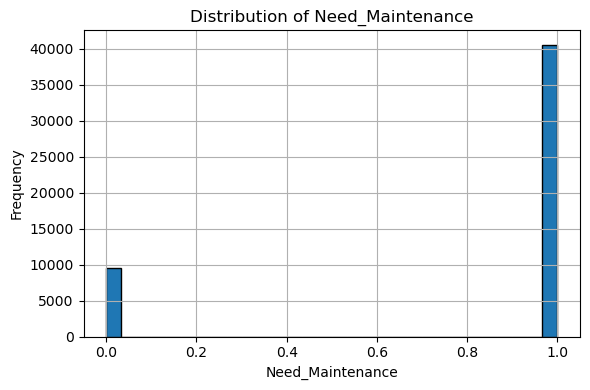

In [76]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(6, 4))
        plt.hist(df[i], bins=30, edgecolor='black') 
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


-  Changing to Date-Time Objects

In [77]:
df['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'])
df['Warranty_Expiry_Date'] = pd.to_datetime(df['Warranty_Expiry_Date'])

- Plotting Object Columns

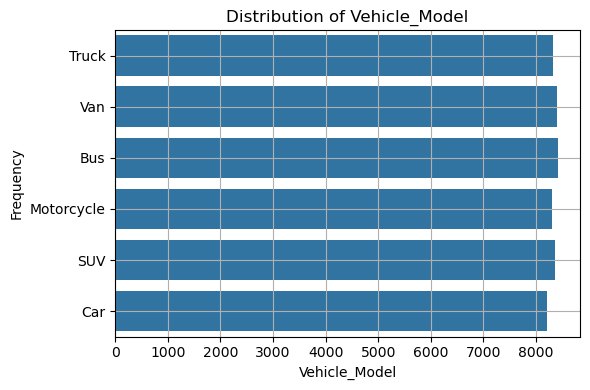

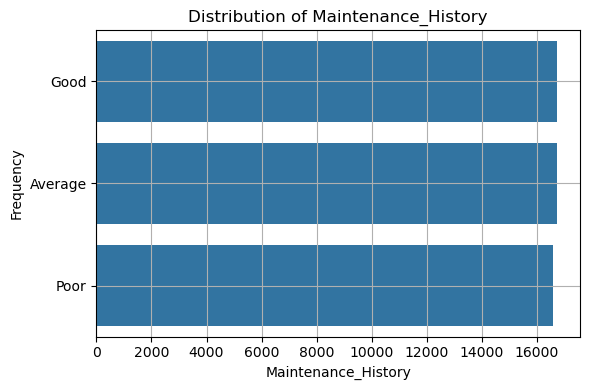

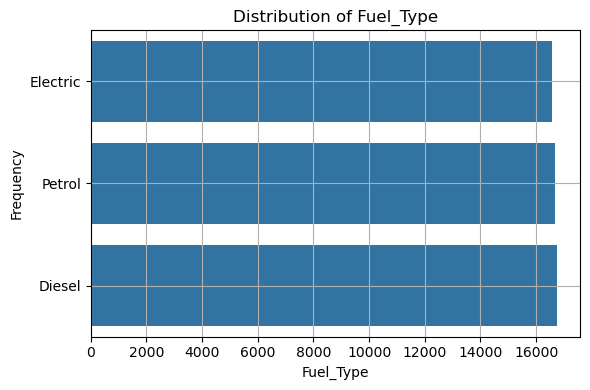

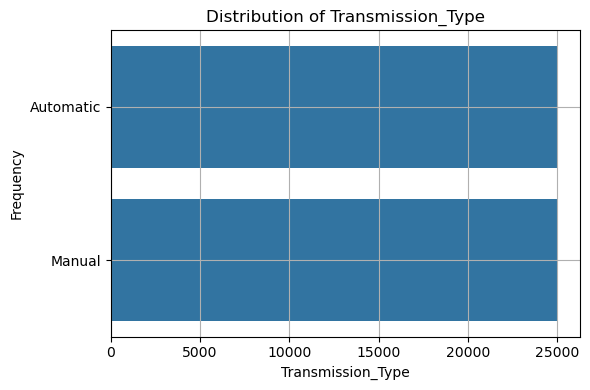

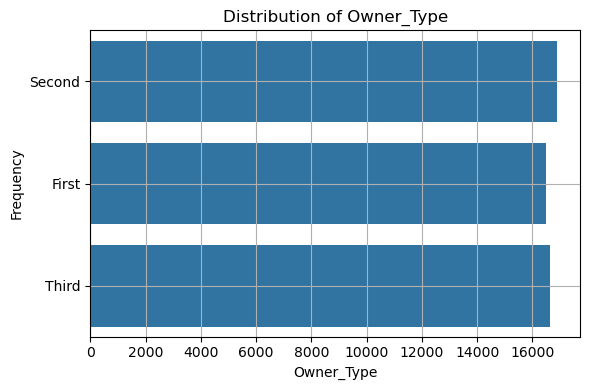

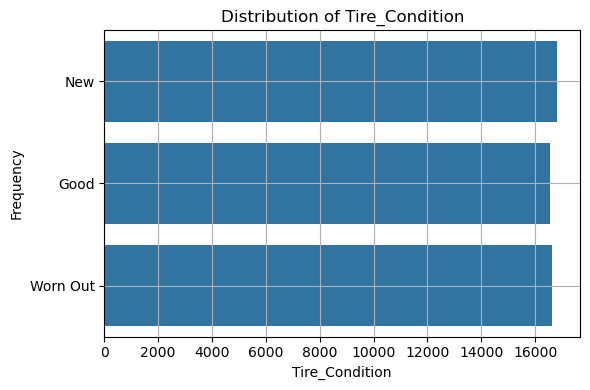

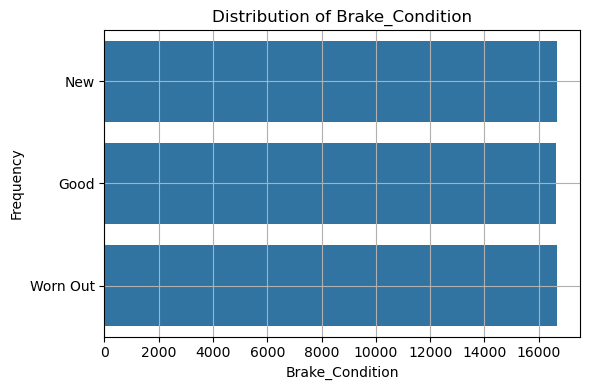

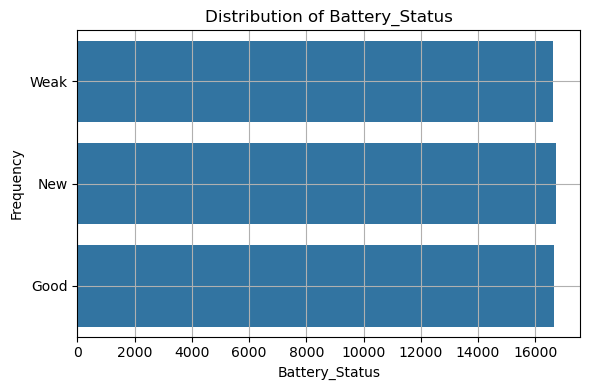

In [78]:
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(6, 4))
        sns.countplot(df[i]) 
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

- Time series Analysis

In [79]:
df.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

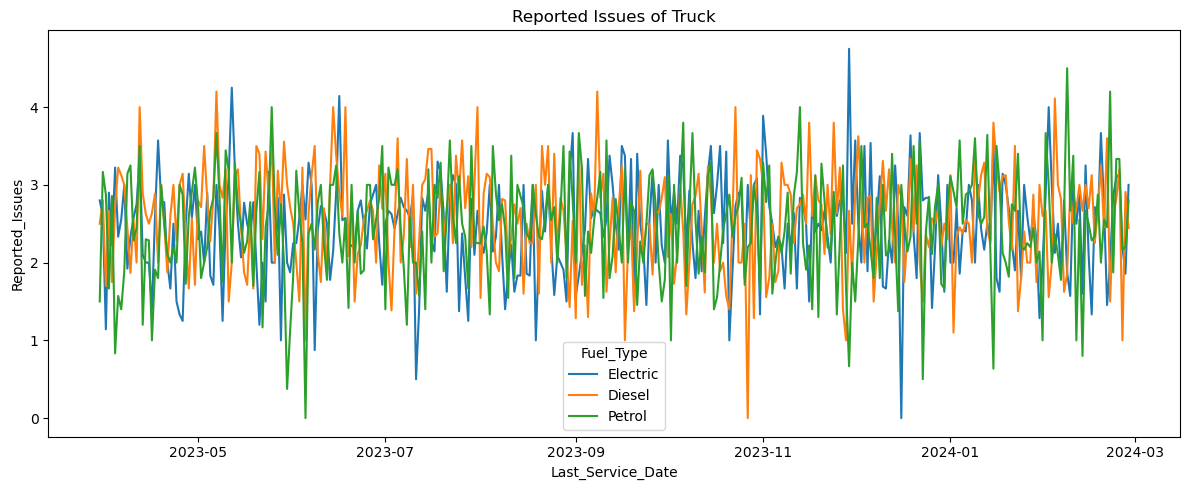

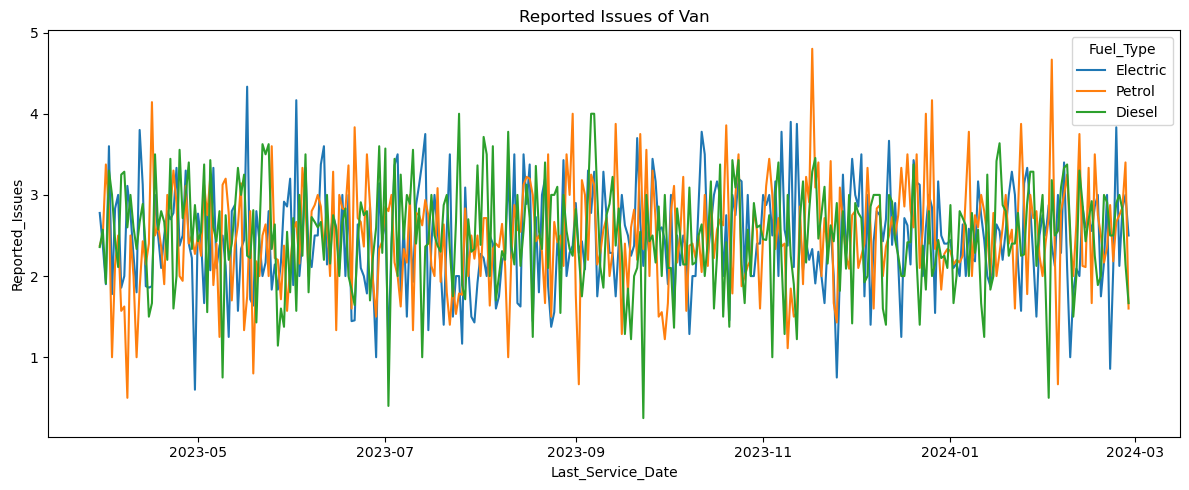

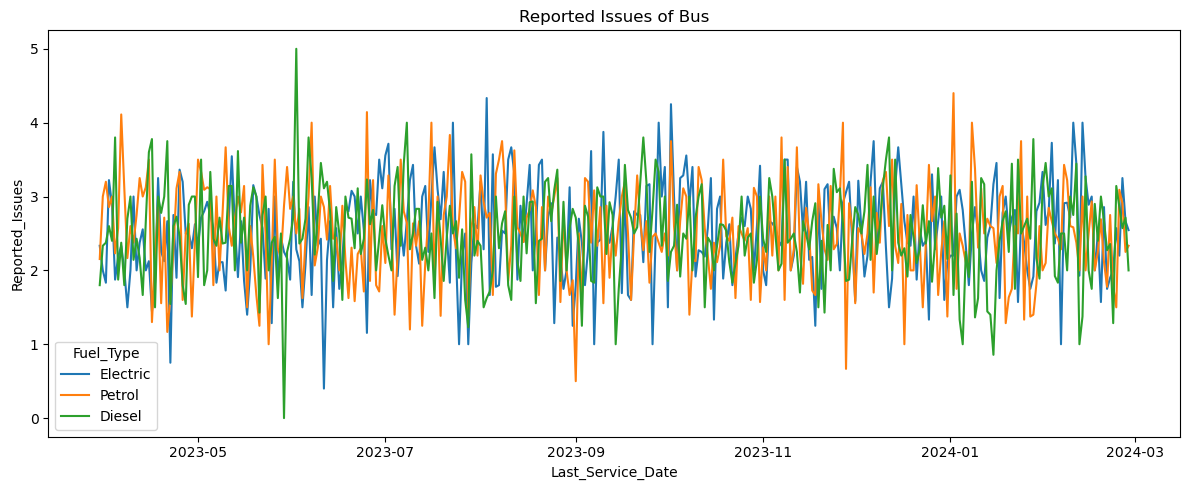

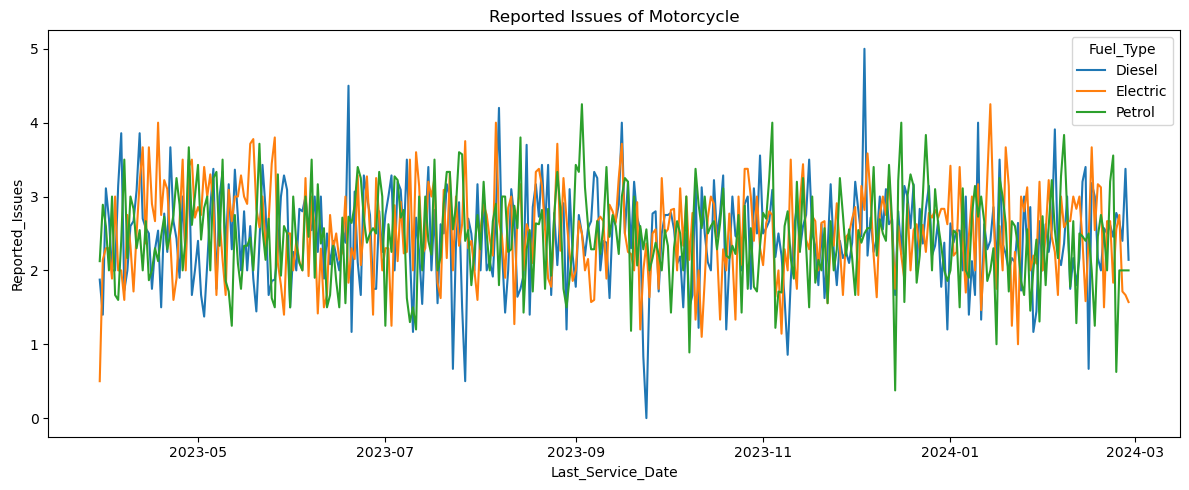

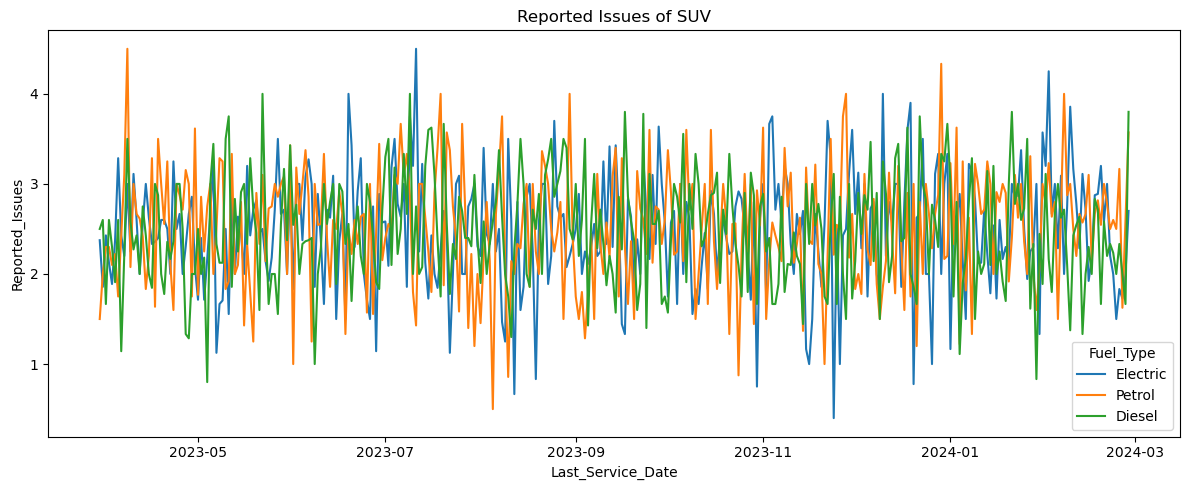

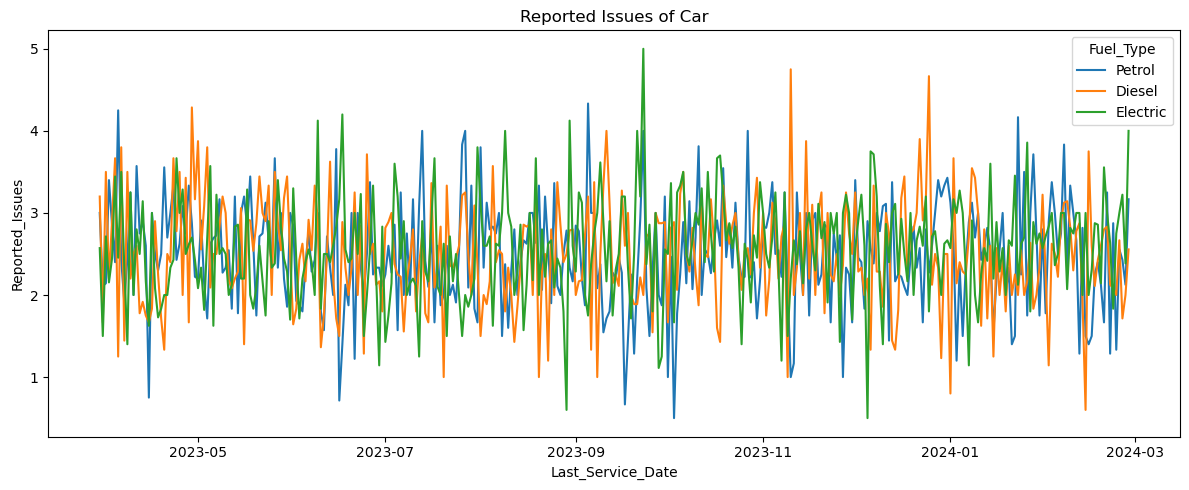

In [80]:
Vehicles = ['Truck', 'Van', 'Bus', 'Motorcycle', 'SUV', 'Car']
for i in Vehicles:
    subset = df[df['Vehicle_Model'] == i] 
    plt.figure(figsize=(12,5))
    sns.lineplot(data = subset, x = 'Last_Service_Date', y = 'Reported_Issues', hue= 'Fuel_Type', errorbar=None)
    plt.title(f'Reported Issues of {i}')
    plt.tight_layout()
    plt.show()

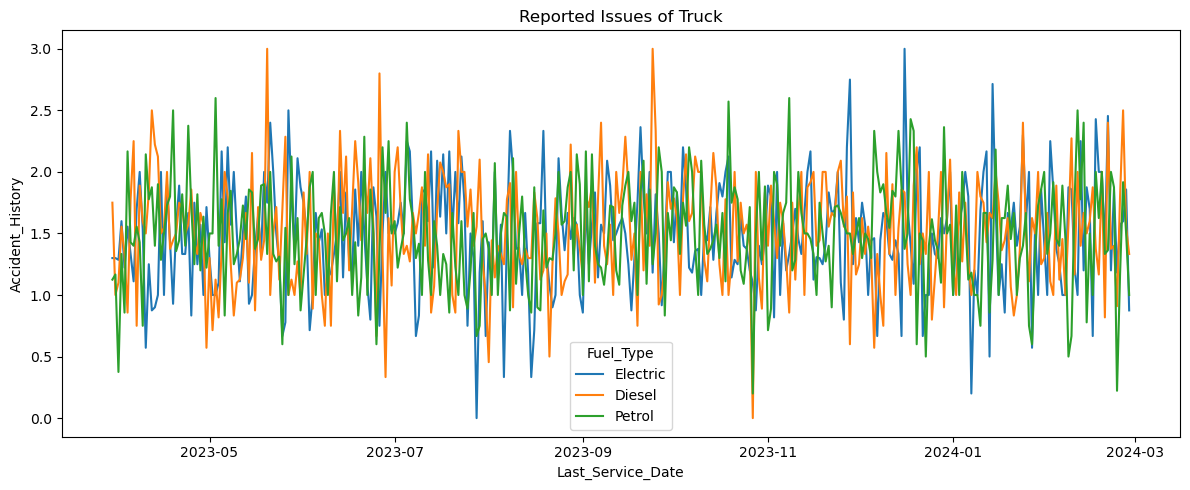

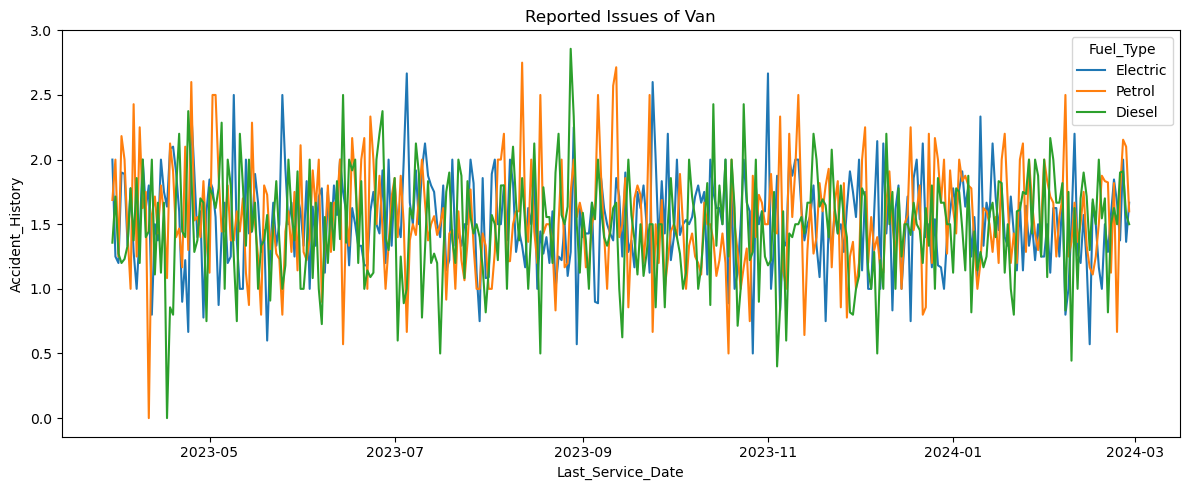

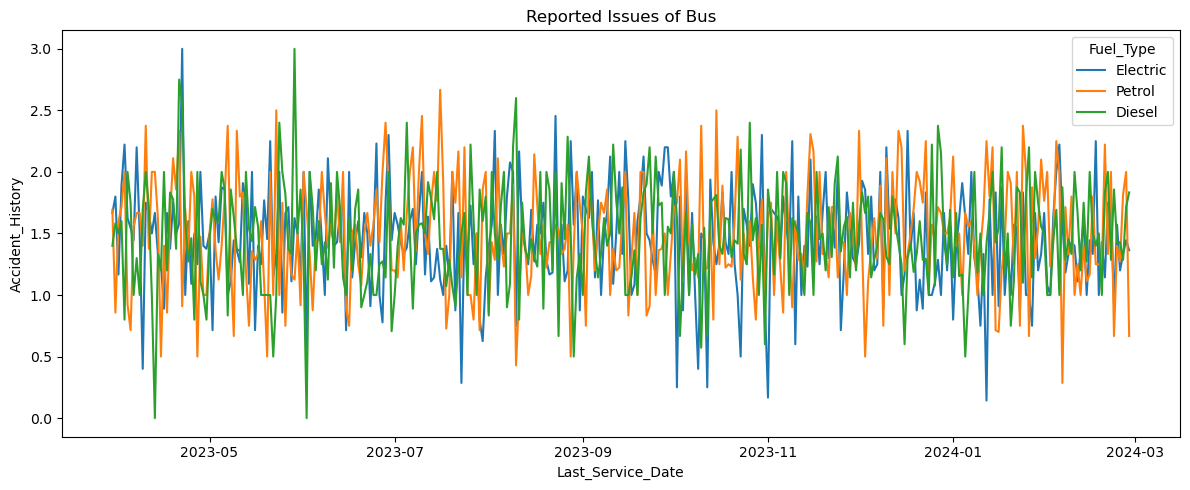

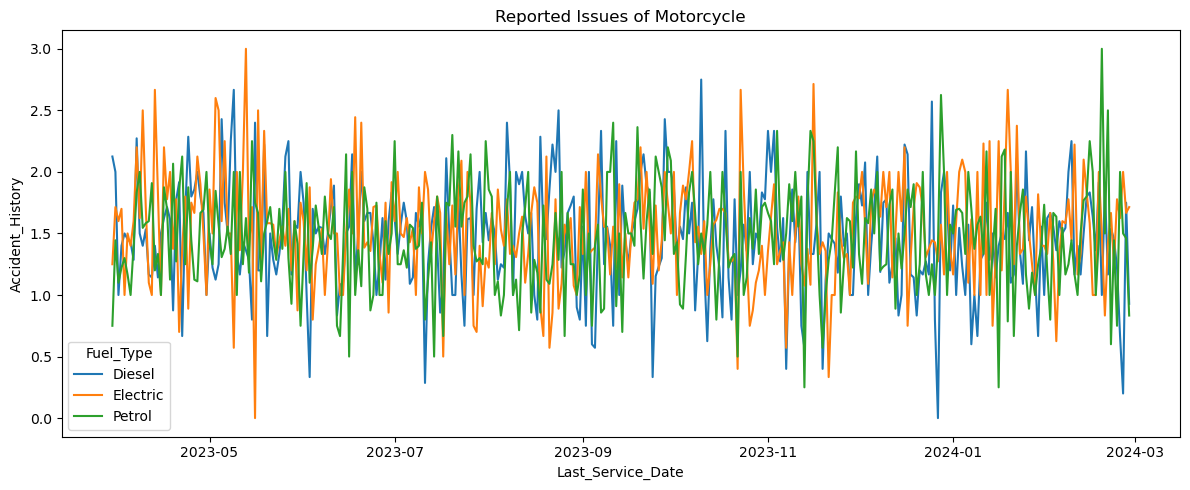

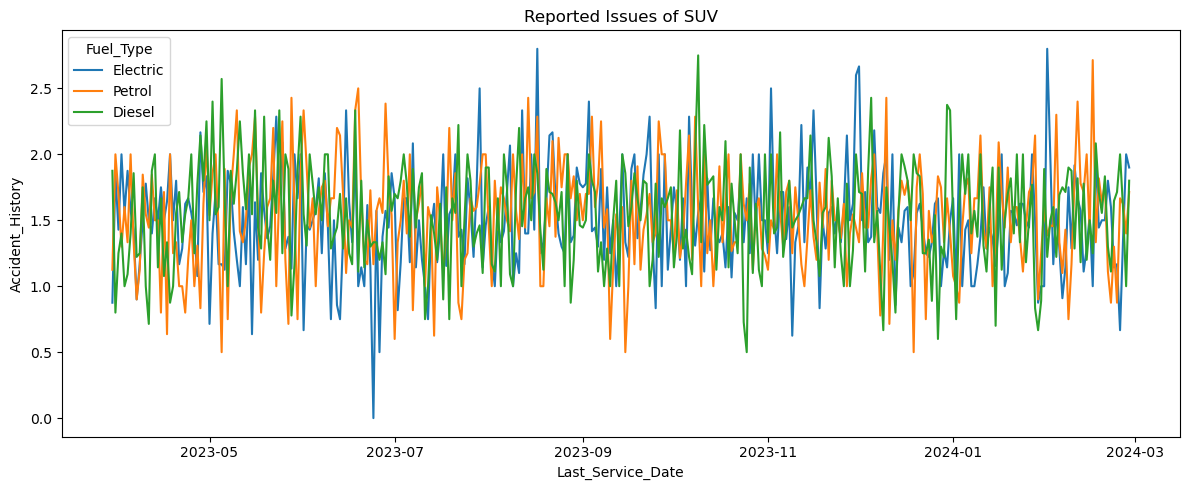

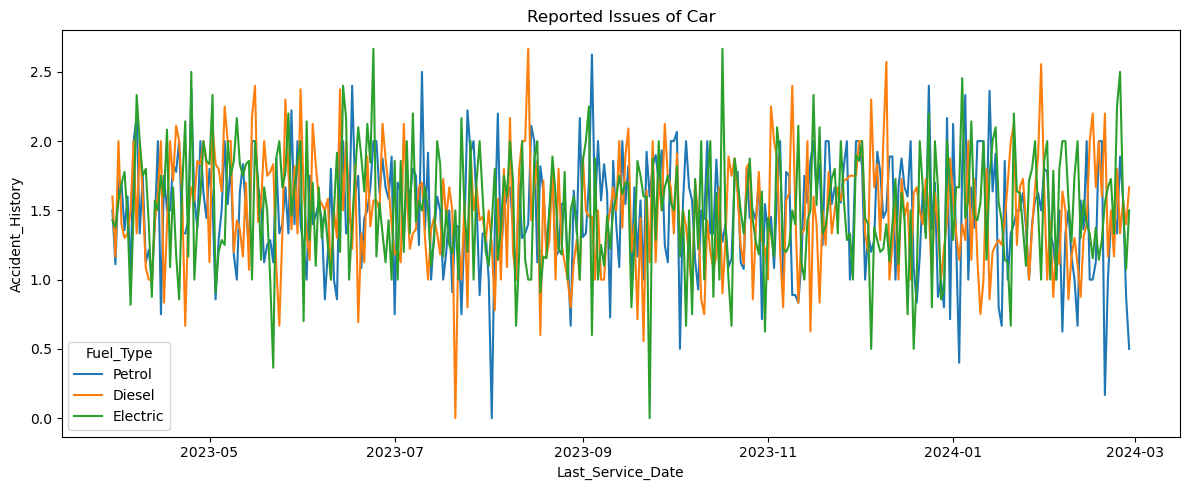

In [81]:
Vehicles = ['Truck', 'Van', 'Bus', 'Motorcycle', 'SUV', 'Car']
for i in Vehicles:
    subset = df[df['Vehicle_Model'] == i] 
    plt.figure(figsize=(12,5))
    sns.lineplot(data = subset, x = 'Last_Service_Date', y = 'Accident_History', hue= 'Fuel_Type', errorbar=None)
    plt.title(f'Reported Issues of {i}')
    plt.tight_layout()
    plt.show()

In [82]:
df.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

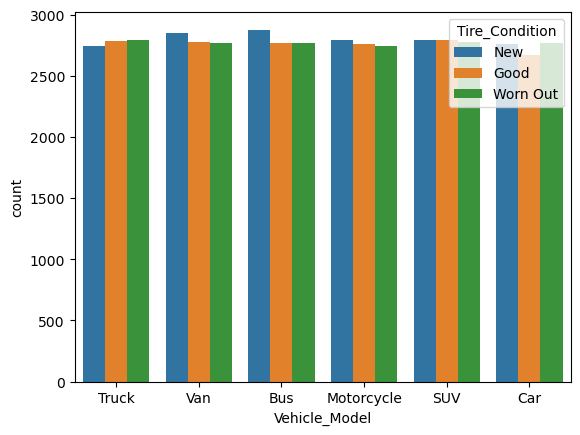

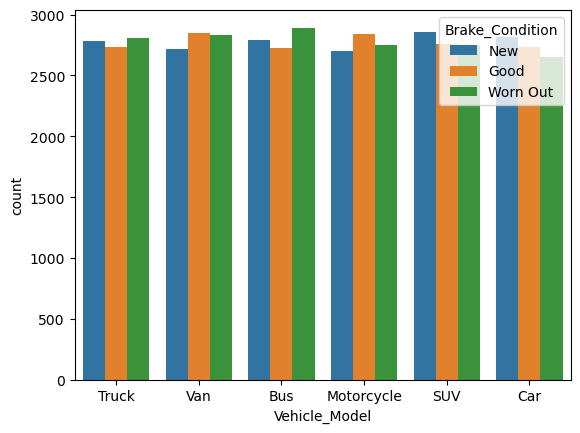

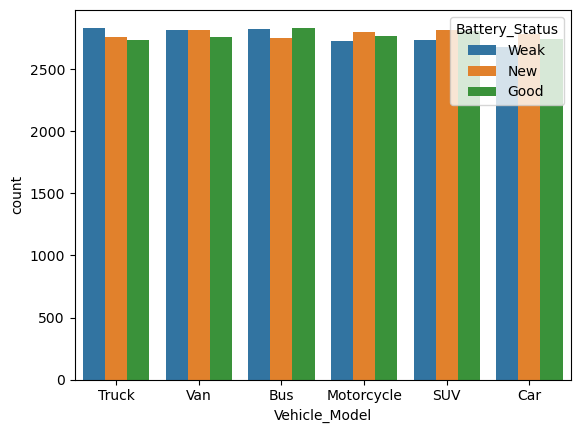

In [83]:
sns.countplot(data= df, x = 'Vehicle_Model', hue= 'Tire_Condition')
plt.show()
sns.countplot(data= df, x = 'Vehicle_Model', hue= 'Brake_Condition')
plt.show()
sns.countplot(data= df, x = 'Vehicle_Model', hue= 'Battery_Status')
plt.show()



In [84]:
df.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

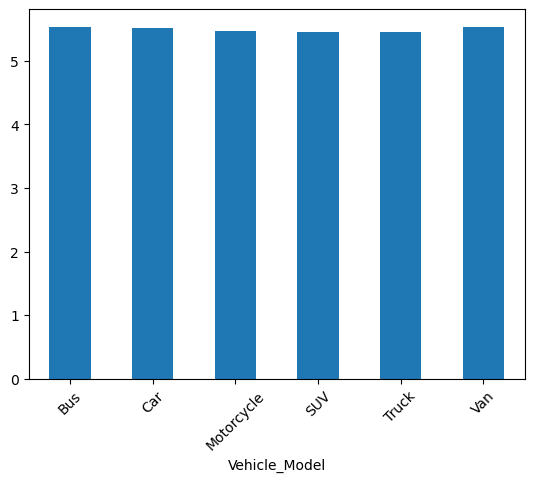

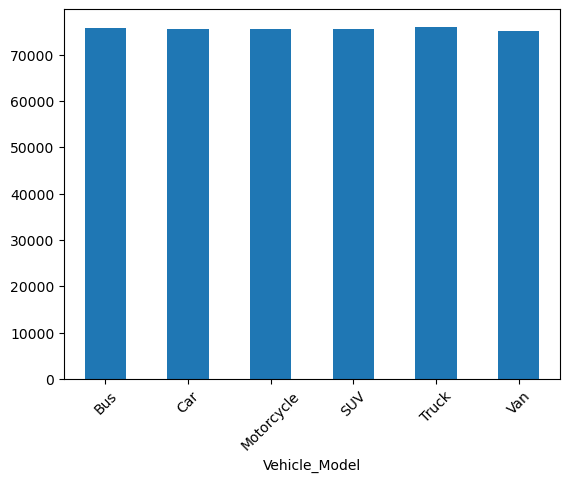

In [85]:
df.groupby('Vehicle_Model')['Vehicle_Age'].mean().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()
df.groupby('Vehicle_Model')['Odometer_Reading'].mean().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

In [86]:
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977483,Good,Good,Weak,1


<Axes: xlabel='Need_Maintenance'>

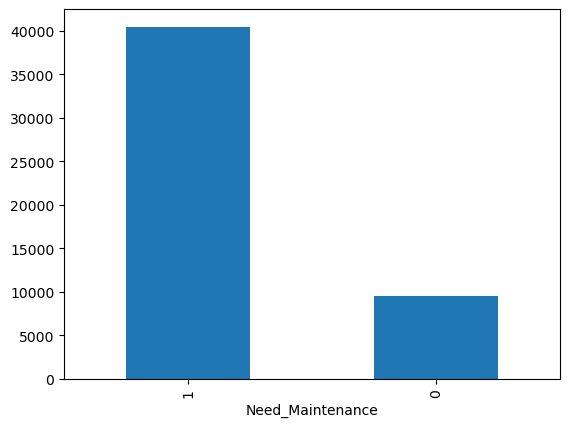

In [87]:
df['Need_Maintenance'].value_counts().plot(kind = 'bar')

<Axes: >

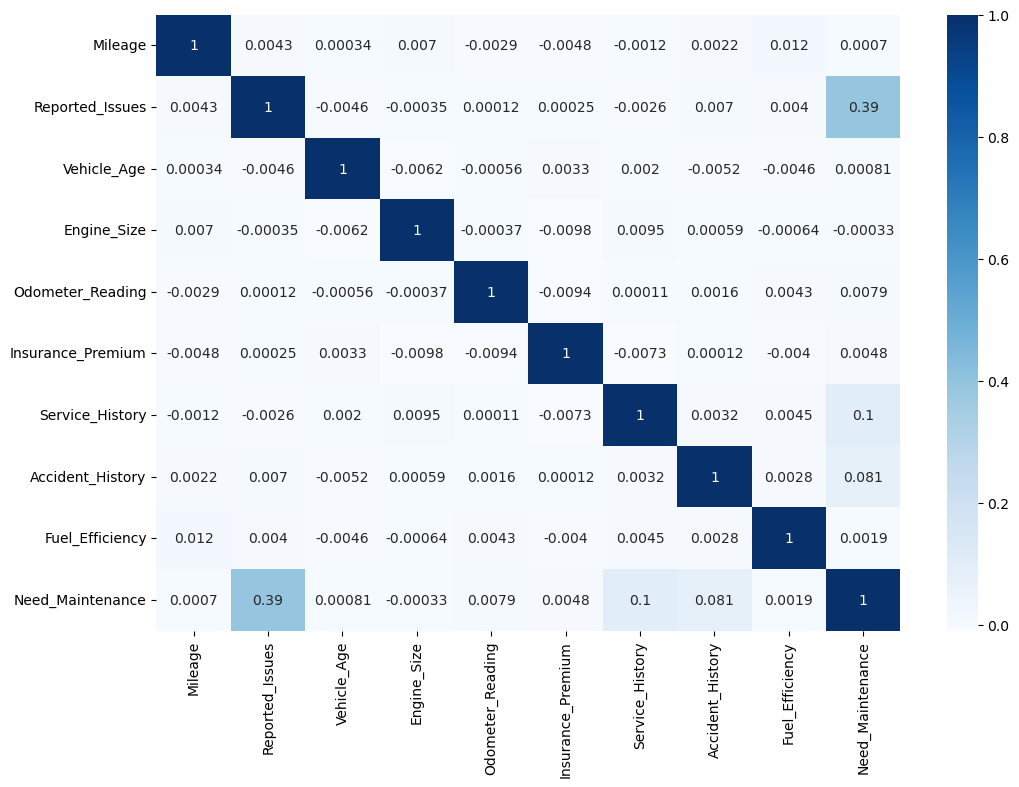

In [88]:
corr_mat = df.corr(numeric_only= True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, cmap="Blues", annot= True)

In [89]:
df[['Service_History', 'Accident_History', 'Reported_Issues']]

df['Hist_Record'] = (df['Service_History'] + df['Accident_History'] + df['Reported_Issues']) /  3

df_updated = df.copy()

df_updated.drop(columns= ['Service_History', 'Accident_History', 'Reported_Issues'], axis= 1, inplace= True)

df_updated.head()

,Vehicle_Model,Mileage,Maintenance_History,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance,Hist_Record
0,Truck,58765,Good,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,13.622204,New,New,Weak,1,3.000000
1,Van,60353,Average,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,13.625307,New,New,Weak,1,2.666667
2,Bus,68072,Poor,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,14.306302,New,Good,Weak,1,2.333333
3,Bus,60849,Average,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,18.709467,New,Worn Out,New,1,4.666667
4,Bus,45742,Poor,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,16.977483,Good,Good,Weak,1,4.333333


In [90]:
object_col = []

for i in df_updated.columns:
    if df[i].dtype == 'object':
        object_col.append(i)

object_col

['Vehicle_Model',
 'Maintenance_History',
 'Fuel_Type',
 'Transmission_Type',
 'Owner_Type',
 'Tire_Condition',
 'Brake_Condition',
 'Battery_Status']

In [92]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for encoded in object_col:
    df_updated[encoded] = encoder.fit_transform(df_updated[encoded])

df_updated


,Vehicle_Model,Mileage,Maintenance_History,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance,Hist_Record
0,4,58765,1,4,1,0,2000,28524,2023-11-23,2025-06-24,1,20782,13.622204,1,1,2,1,3.000000
1,5,60353,0,7,1,0,2500,133630,2023-09-21,2025-06-04,1,23489,13.625307,1,1,2,1,2.666667
2,0,68072,2,2,1,0,1500,34022,2023-06-27,2025-04-27,0,17979,14.306302,1,0,2,1,2.333333
3,0,60849,0,5,2,0,2500,81636,2023-08-24,2025-11-05,1,6220,18.709467,1,2,1,1,4.666667
4,0,45742,2,1,2,1,2000,97162,2023-05-25,2025-09-14,2,16446,16.977483,0,0,2,1,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,77229,1,6,0,0,2500,97404,2023-11-24,2025-09-15,2,5217,10.357298,1,0,2,1,2.666667
49996,4,54742,1,4,0,1,800,13421,2023-07-14,2025-01-21,1,15856,14.924022,2,1,0,1,3.000000
49997,5,75601,2,4,1,0,1500,124851,2023-09-09,2024-11-09,0,6019,19.859243,2,2,2,1,3.333333
49998,1,66181,1,7,1,1,2500,103182,2023-08-26,2025-05-22,2,5030,10.720555,1,0,2,1,2.666667
